# Machine Learning Preparation

EDA & data preprocessing on product classification 

Source:
https://drive.google.com/file/d/10xbH5F9irS3OzmC0wNq9LIAfFQ1uSkT_/view

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load & Describe Data

In [4]:
df = pd.read_csv('Product_Exclusive_Classification.csv')
df.head()

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
0,50,SEPHORA COLLECTION,no category,5.0,46.0,0.0,50.0,50.0,0
1,304,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
2,404,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
3,443,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0
4,463,SEPHORA COLLECTION,no category,0.0,0.0,0.0,50.0,50.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [6]:
{len(df)}

{8000}

Categorical & numerical column divided:

In [7]:
cats = ['brand', 'category']
nums = ['id', 'rating', 'number_of_reviews', 'love', 'price', 'value_price', 'exclusive']

In [8]:
df.sample(10)

,id,brand,category,rating,number_of_reviews,love,price,value_price,exclusive
4558,2070795,Indie Lee,Toners,4.5,251.0,23400.0,34.0,34.0,0
5229,2125698,Perricone MD,Face Serums,4.0,341.0,3100.0,99.0,99.0,0
103,502443,CLINIQUE,Eye Creams & Treatments,4.0,270.0,10200.0,46.0,46.0,0
7609,2272532,NUDESTIX,Face Brushes,4.5,11.0,2800.0,26.0,26.0,0
883,1474097,SEPHORA COLLECTION,Eyeliner,3.5,478.0,23100.0,10.0,10.0,1
2098,1785526,Shiseido,Face Serums,4.0,8.0,1900.0,100.0,100.0,0
3984,2029429,IT Cosmetics,Moisturizers,3.5,31.0,2600.0,17.0,17.0,0
3685,1989847,Kiehl's Since 1851,Hair Styling Products,4.0,4.0,571.0,18.0,18.0,0
1808,1735786,HUM Nutrition,Beauty Supplements,4.0,42.0,13700.0,40.0,40.0,0
3598,1985241,OLEHENRIKSEN,Skincare,4.0,211.0,32900.0,24.0,24.0,1


In [9]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,8.000000e+03,7905.000000,7991.000000,7.966000e+03,7992.000000,7983.000000,8000.000000
mean,1.910231e+06,4.085136,303.574396,1.756396e+04,49.900935,50.983300,0.255875
std,3.858353e+05,0.761069,931.724460,4.425339e+04,46.864764,48.473049,0.436379
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773379e+06,4.000000,14.000000,2.000000e+03,24.000000,24.000000,0.000000
50%,2.030360e+06,4.000000,56.000000,5.500000e+03,35.000000,35.000000,0.000000
75%,2.185074e+06,4.500000,231.500000,1.530000e+04,59.000000,60.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.000000,1.000000


In [10]:
df[cats].describe()

,brand,category
count,8000,7987
unique,310,142
top,SEPHORA COLLECTION,Perfume
freq,492,619


# Exploratory Data Analysis (EDA)

## Numerical Approach

In [34]:
for col in cats:
    print('Value count columns {col}:')
    print(df[col].value_counts())
    print()

Value count columns {col}:
SEPHORA COLLECTION     492
CLINIQUE               211
TOM FORD               150
tarte                  143
Kiehl's Since 1851     122
                      ... 
bkr                      1
DL.MD                    1
High Beauty              1
Too Cool For School      1
Cocofloss                1
Name: brand, Length: 310, dtype: int64

Value count columns {col}:
Perfume                  632
Moisturizers             395
Face Serums              334
Value & Gift Sets        241
Face Wash & Cleansers    225
                        ... 
Powder Brush               1
Cleansing Brushes          1
Curls & Coils              1
Lid Shadow Brush           1
Body Moisturizers          1
Name: category, Length: 142, dtype: int64



## Graphical Approach

#### Univariate Analysis

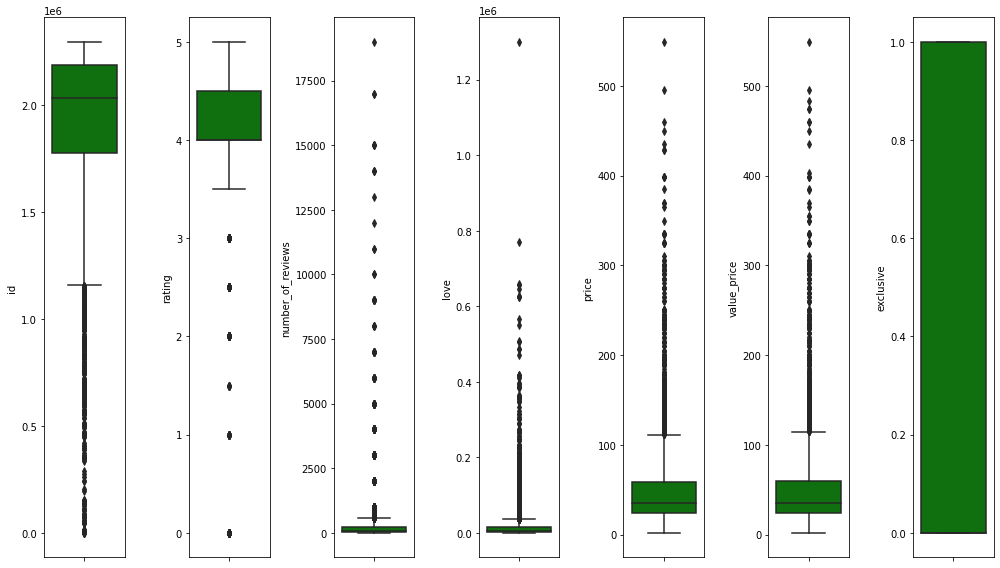

In [14]:
# Box Plots
plt.figure(figsize=(14,8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='green')
    plt.tight_layout()

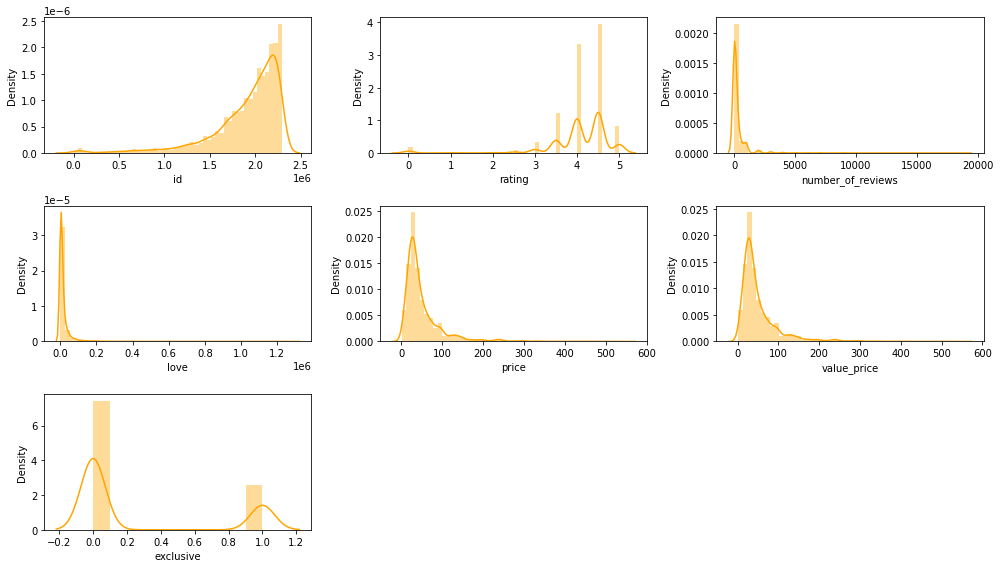

In [17]:
# Distribution Plots
plt.figure(figsize=(14, 8))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='orange')
    plt.tight_layout()

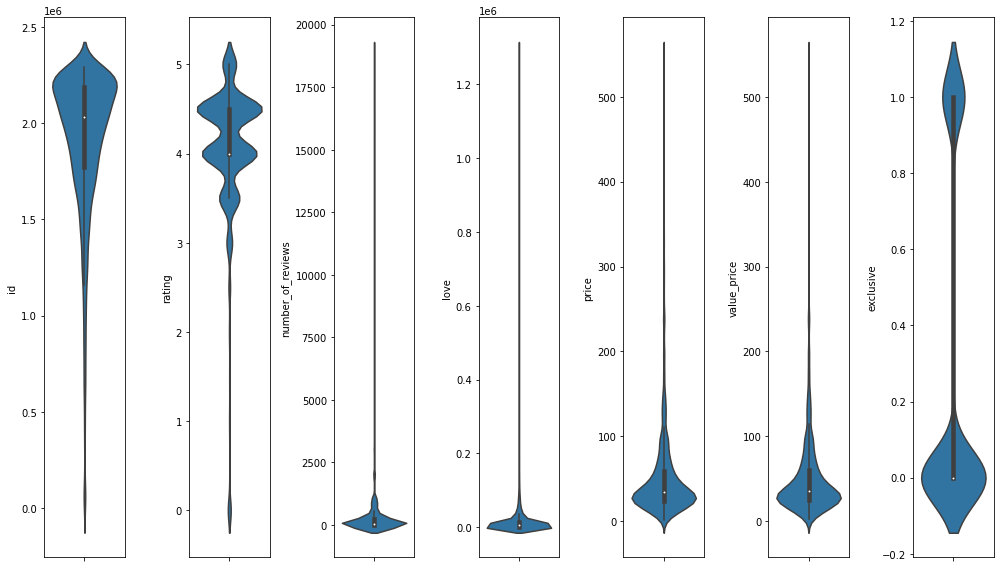

In [18]:
# Violin Plots
plt.figure(figsize=(14, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

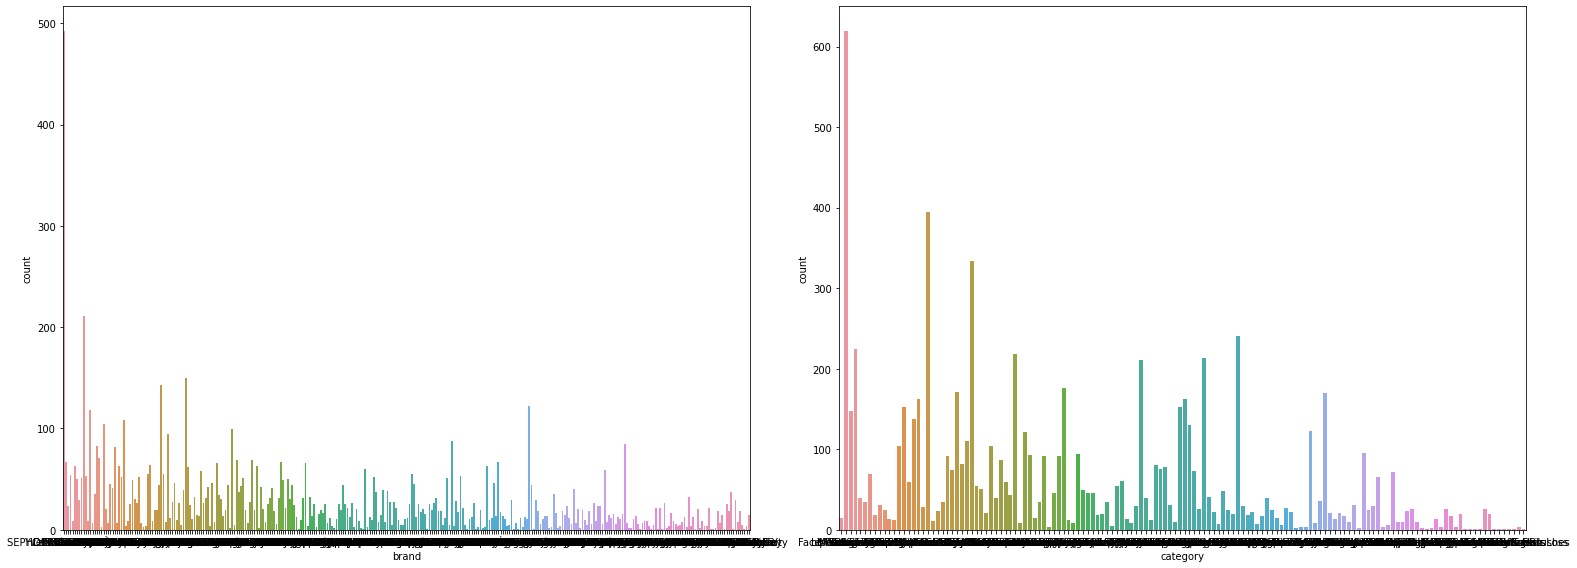

In [19]:
# Count Plots
plt.figure(figsize=(22, 8))
for i in range(0, len(cats)):
    plt.subplot(1, 2, i+1)
    sns.countplot(df[cats[i]], orient='v')
    plt.tight_layout()

#### Multivariate Analysis

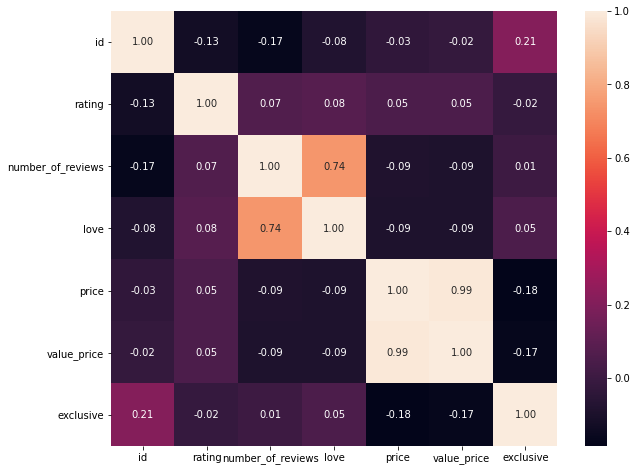

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

<Figure size 720x720 with 0 Axes>

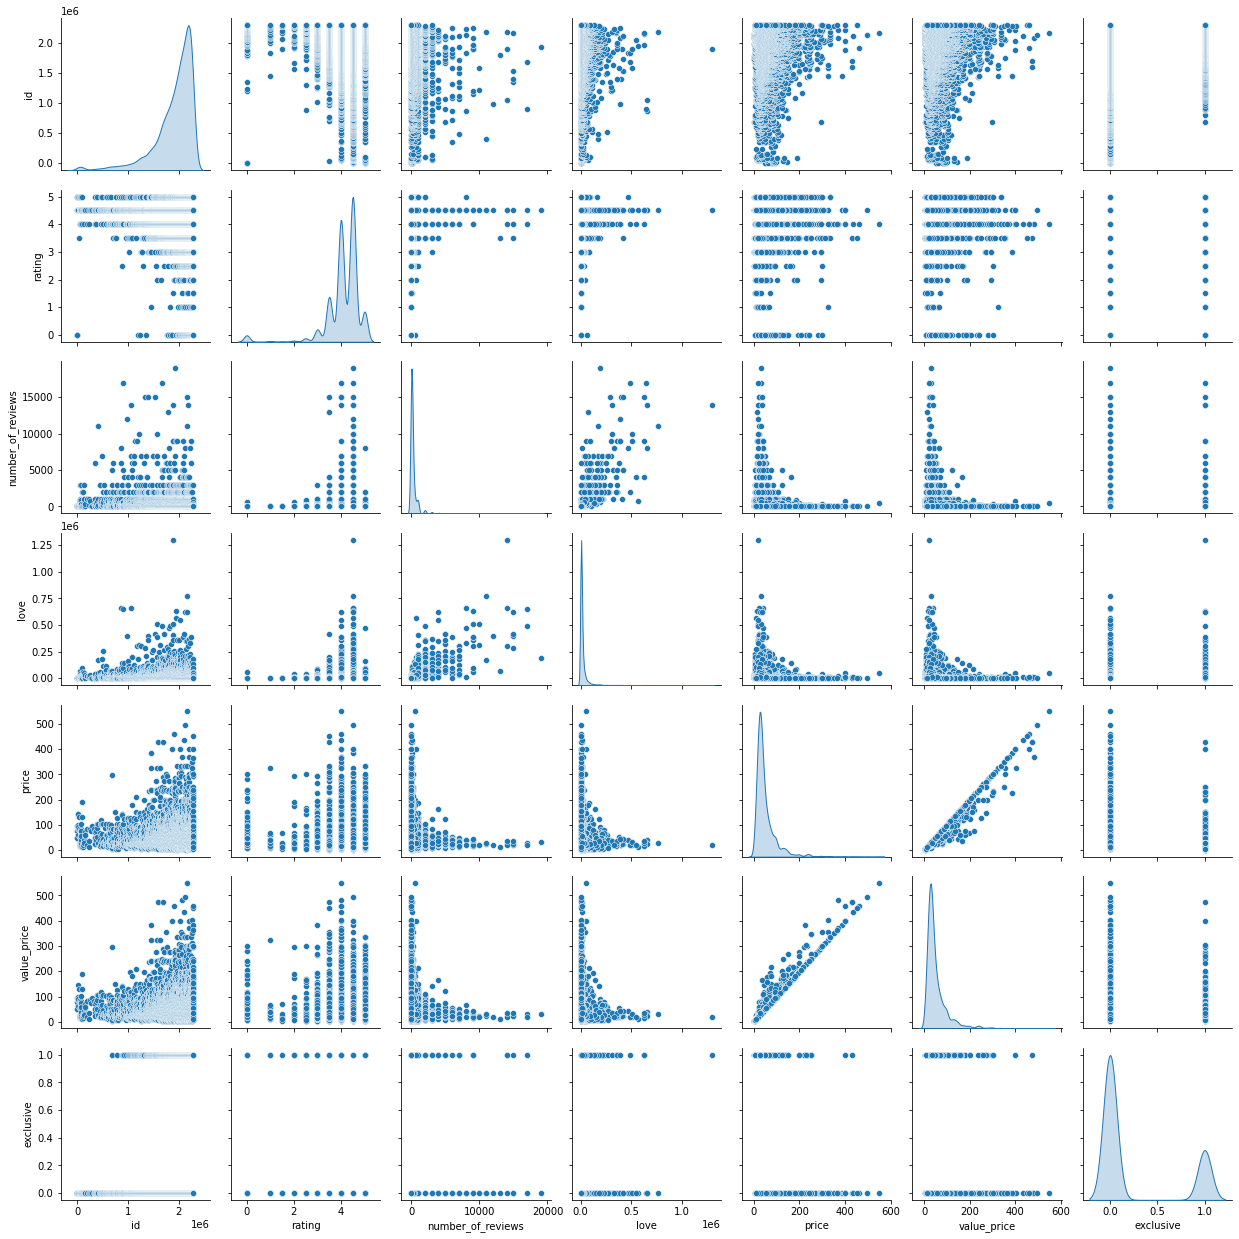

In [21]:
# Pair Plots
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')
plt.show()

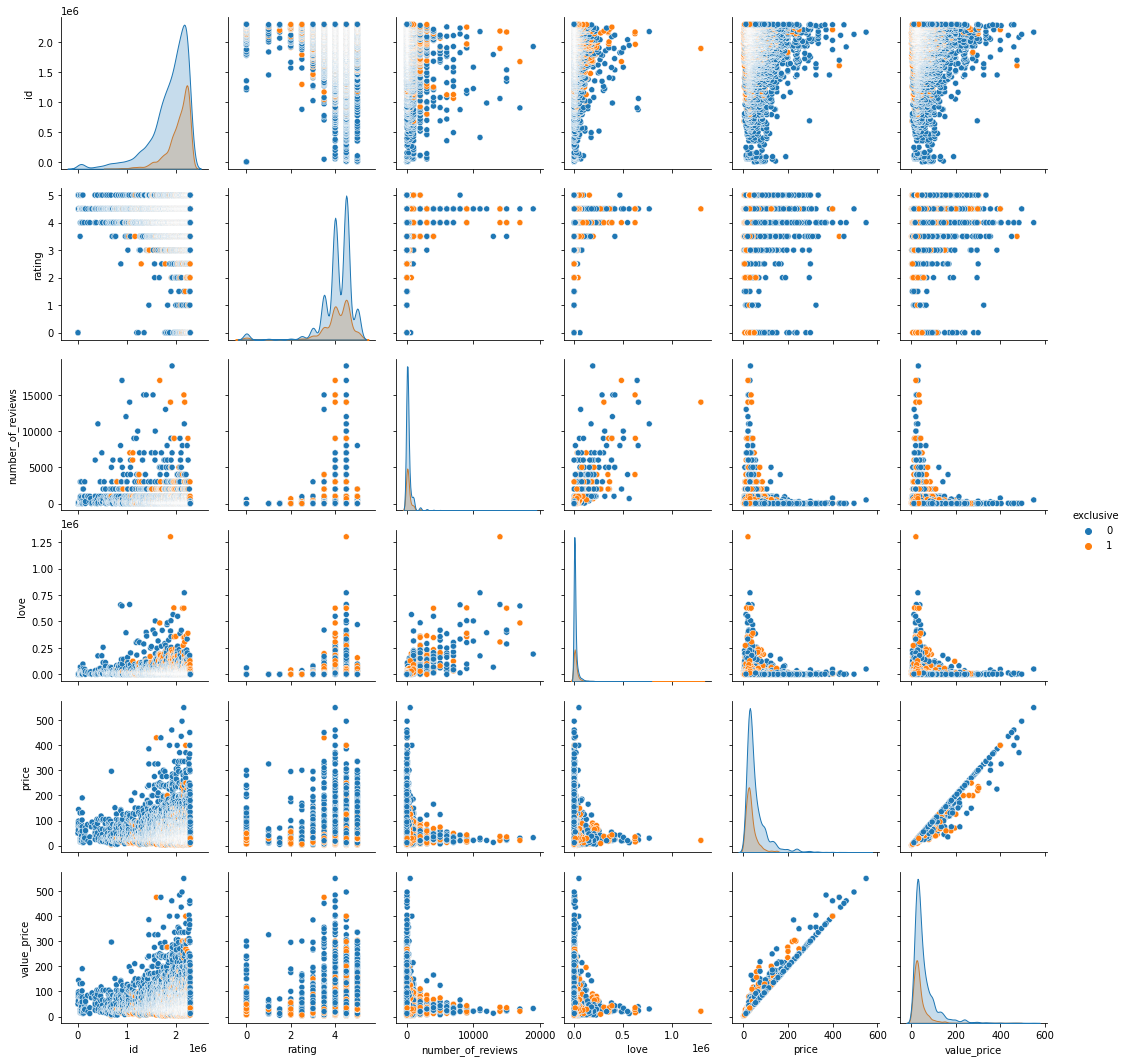

In [22]:
# Pair Plot + Hue
sns.pairplot(df, diag_kind='kde', hue='exclusive')
plt.show()

In [24]:
# Category Plots

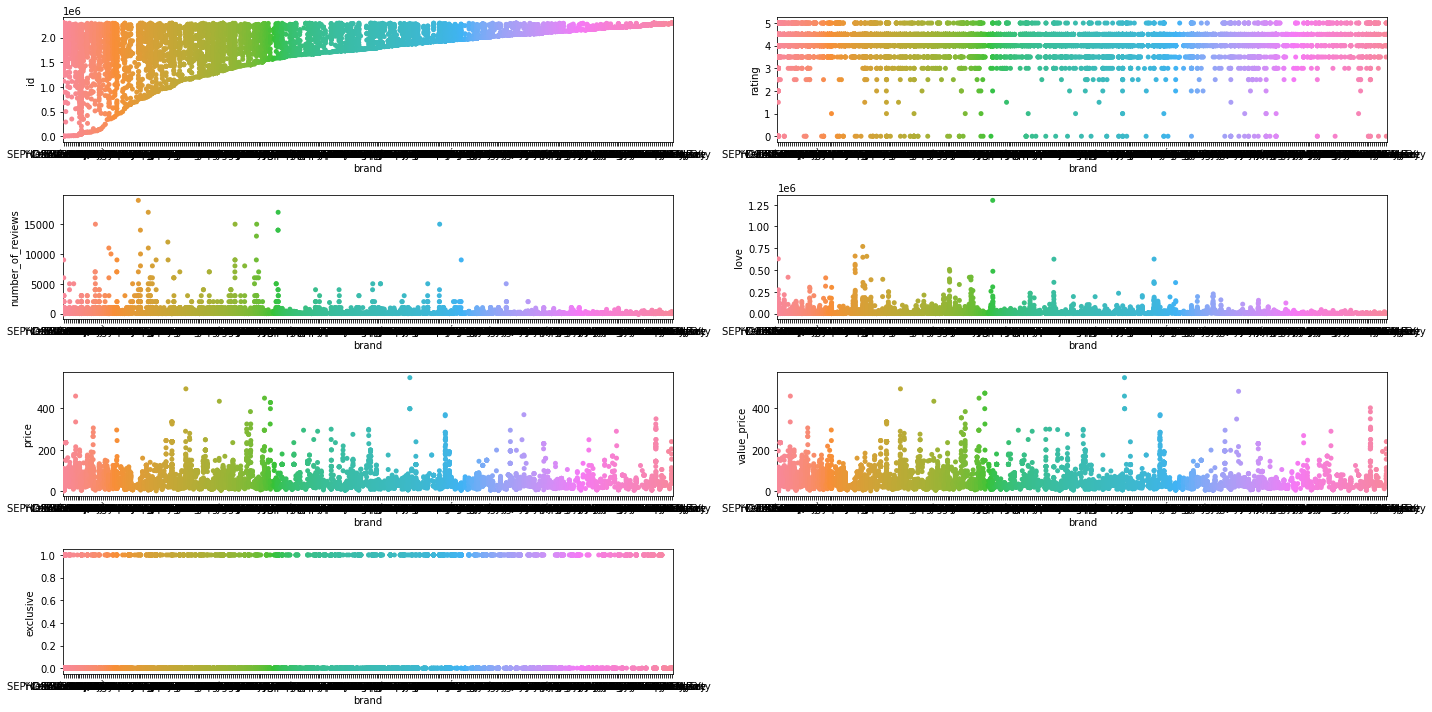

In [23]:
fig = plt.figure(figsize=(20, 10))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 2, i+1) 
    sns.stripplot(ax=ax, data=df, x='brand', y=nums[i]) 
    plt.tight_layout() 
    if i != 0: plt.close(i+1)  
    plt.close(len(nums) + 1) 

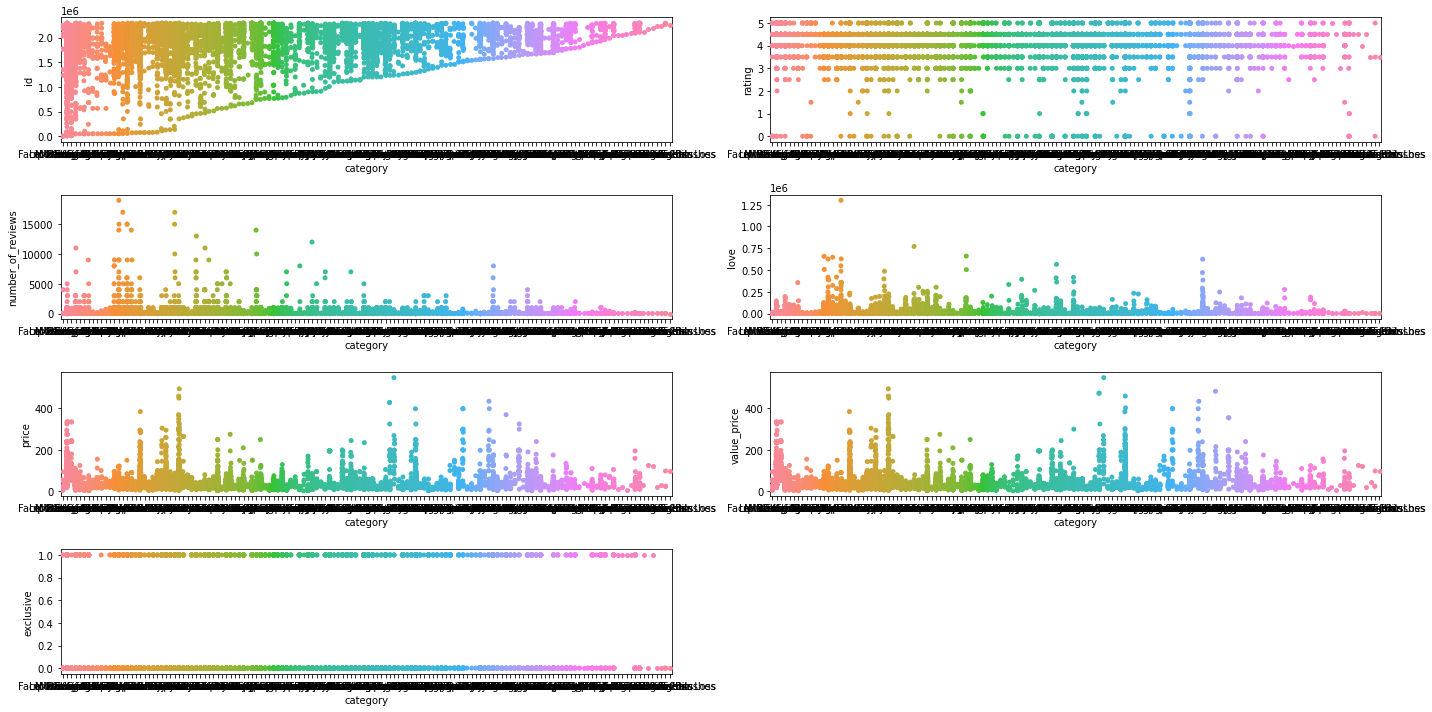

In [25]:
fig = plt.figure(figsize=(20, 10))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(4, 2, i+1) 
    sns.stripplot(ax=ax, data=df, x='category', y=nums[i]) 
    plt.tight_layout() 
    if i != 0: plt.close(i+1)  
    plt.close(len(nums) + 1) 

# Data Preparation

### Missing Values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8000 non-null   int64  
 1   brand              8000 non-null   object 
 2   category           7987 non-null   object 
 3   rating             7905 non-null   float64
 4   number_of_reviews  7991 non-null   float64
 5   love               7966 non-null   float64
 6   price              7992 non-null   float64
 7   value_price        7983 non-null   float64
 8   exclusive          8000 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 562.6+ KB


In [28]:
df.isna().sum()

id                    0
brand                 0
category             13
rating               95
number_of_reviews     9
love                 34
price                 8
value_price          17
exclusive             0
dtype: int64

In [29]:
# Numeric (Replaced by Mean)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['number_of_reviews'].fillna(df['number_of_reviews'].mean(), inplace=True)
df['love'].fillna(df['love'].mean(), inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['value_price'].fillna(df['value_price'].mean(), inplace=True)

In [30]:
# Categorical (Replaced by Mode)
df['brand'].fillna(df['brand'].mode()[0], inplace=True)
df['category'].fillna(df['category'].mode()[0], inplace=True)

In [31]:
df.isna().sum()

id                   0
brand                0
category             0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
exclusive            0
dtype: int64

### Duplicate Values

In [32]:
print(df.duplicated().sum()) #1
print(df.duplicated(subset=['id','brand','category']).sum()) #2
print(df.duplicated(subset=['id','brand','category','rating']).sum()) #3
print(df.duplicated(subset=['id','brand','category','rating','number_of_reviews']).sum()) #4
print(df.duplicated(subset=['id','brand','category','rating','number_of_reviews','love']).sum()) #5

0
27
11
1
0


### Outliers

In [33]:
len(df)

8000

In [36]:
print(f'number rows original:{len(df)}')
filter = np.array([True] * len(df))
for col in ['rating', 'number_of_reviews', 'love', 'price', 'value_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filter = ((df[col] >= low_limit) & (df[col] <= high_limit))
    
df_filtered = df[filter]
print(f'number of rows w/ outlier: {len(df_filtered)}')

number rows original:8000
number of rows w/ outlier: 7339


In [37]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7339 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7339 non-null   int64  
 1   brand              7339 non-null   object 
 2   category           7339 non-null   object 
 3   rating             7339 non-null   float64
 4   number_of_reviews  7339 non-null   float64
 5   love               7339 non-null   float64
 6   price              7339 non-null   float64
 7   value_price        7339 non-null   float64
 8   exclusive          7339 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 573.4+ KB


### Normalization / Standardization

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [41]:
df_filtered.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive
count,7.339000e+03,7339.000000,7339.000000,7.339000e+03,7339.000000,7339.000000,7339.000000
mean,1.909544e+06,4.078507,321.954922,1.847998e+04,39.001291,39.524921,0.270064
std,3.900021e+05,0.752227,965.683998,4.577774e+04,23.205597,23.454955,0.444023
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000
25%,1.773407e+06,4.000000,16.000000,2.100000e+03,24.000000,24.000000,0.000000
50%,2.030823e+06,4.000000,61.000000,5.900000e+03,32.000000,33.000000,0.000000
75%,2.185842e+06,4.500000,258.000000,1.670000e+04,49.000000,50.000000,1.000000
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,140.000000,114.000000,1.000000


In [43]:
df_filtered['rating_norm'] = MinMaxScaler().fit_transform(df_filtered['rating'].values.reshape(len(df_filtered), 1))
df_filtered['reviews_norm'] = MinMaxScaler().fit_transform(df_filtered['number_of_reviews'].values.reshape(len(df_filtered), 1))
df_filtered['love_norm'] = MinMaxScaler().fit_transform(df_filtered['love'].values.reshape(len(df_filtered), 1))
df_filtered['price_norm'] = MinMaxScaler().fit_transform(df_filtered['price'].values.reshape(len(df_filtered), 1))

In [44]:
df_filtered.describe()

,id,rating,number_of_reviews,love,price,value_price,exclusive,rating_norm,reviews_norm,love_norm,price_norm
count,7.339000e+03,7339.000000,7339.000000,7.339000e+03,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000,7339.000000
mean,1.909544e+06,4.078507,321.954922,1.847998e+04,39.001291,39.524921,0.270064,0.815701,0.016945,0.014215,0.268125
std,3.900021e+05,0.752227,965.683998,4.577774e+04,23.205597,23.454955,0.444023,0.150445,0.050825,0.035214,0.168157
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.773407e+06,4.000000,16.000000,2.100000e+03,24.000000,24.000000,0.000000,0.800000,0.000842,0.001615,0.159420
50%,2.030823e+06,4.000000,61.000000,5.900000e+03,32.000000,33.000000,0.000000,0.800000,0.003211,0.004538,0.217391
75%,2.185842e+06,4.500000,258.000000,1.670000e+04,49.000000,50.000000,1.000000,0.900000,0.013579,0.012846,0.340580
max,2.293801e+06,5.000000,19000.000000,1.300000e+06,140.000000,114.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_filtered = df_filtered.rename(columns={'id': 'ID','brand': 'Brand','category': 'Category','rating': 'Rating', 'number_of_reviews': 'Reviews','love': 'Love','price': 'Price','value_price': 'Value', 'exclusive': 'Exclusive'})

In [46]:
cats2 = ['Brand','Category']
nums2 = ['ID','Rating','Reviews','Love','Price','Value','Exclusive']

### Feature Encoding

In [47]:
print(cats2)
print( )
df_filtered[cats2].describe()

['Brand', 'Category']



,Brand,Category
count,7339,7339
unique,303,140
top,SEPHORA COLLECTION,Perfume
freq,489,400


### Class Imbalance

In [48]:
df_filtered['Exclusive'].value_counts()

0    5357
1    1982
Name: Exclusive, dtype: int64

In [49]:
x = df_filtered[[col for col in df_filtered.columns if (str(df_filtered[col].dtype) != 'object') and col not in ['Exclusive']]]
y = df_filtered['Exclusive'].values
print(x.shape)
print(y.shape)

(7339, 10)
(7339,)


In [50]:
from imblearn import under_sampling, over_sampling
x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(0.7).fit_resample(x, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(x, y)

In [51]:
print('Original:')
print(pd.Series(y).value_counts()) #Original
print( )
print('UnderSample:')
print(pd.Series(y_under).value_counts()) #UnderSample
print( )
print('OverSamole:')
print(pd.Series(y_over).value_counts()) #OverSample
print( )
print('SMOTE:')
print(pd.Series(y_over_SMOTE).value_counts()) #SMOTE

Original:
0    5357
1    1982
dtype: int64

UnderSample:
0    3964
1    1982
dtype: int64

OverSamole:
0    5357
1    3749
dtype: int64

SMOTE:
0    5357
1    5357
dtype: int64
